In [9]:
import re
from collections import Counter,defaultdict
import random
import math
import requests
import os

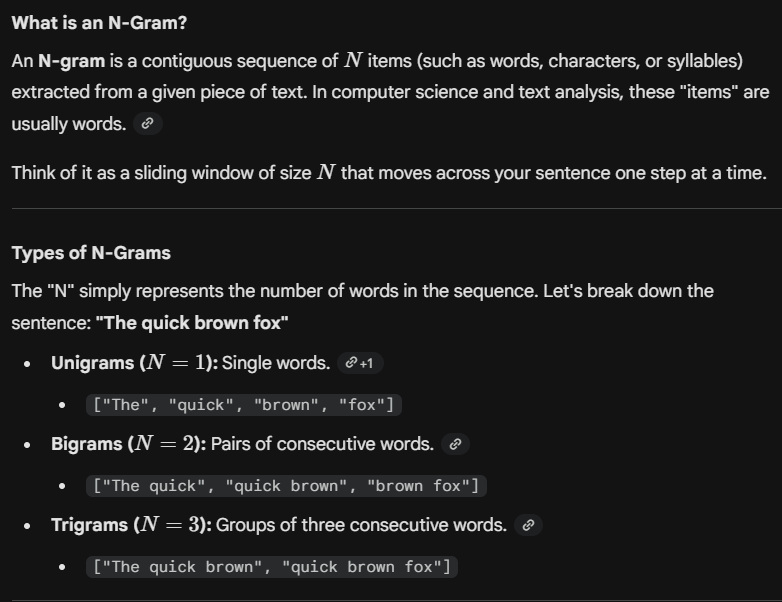

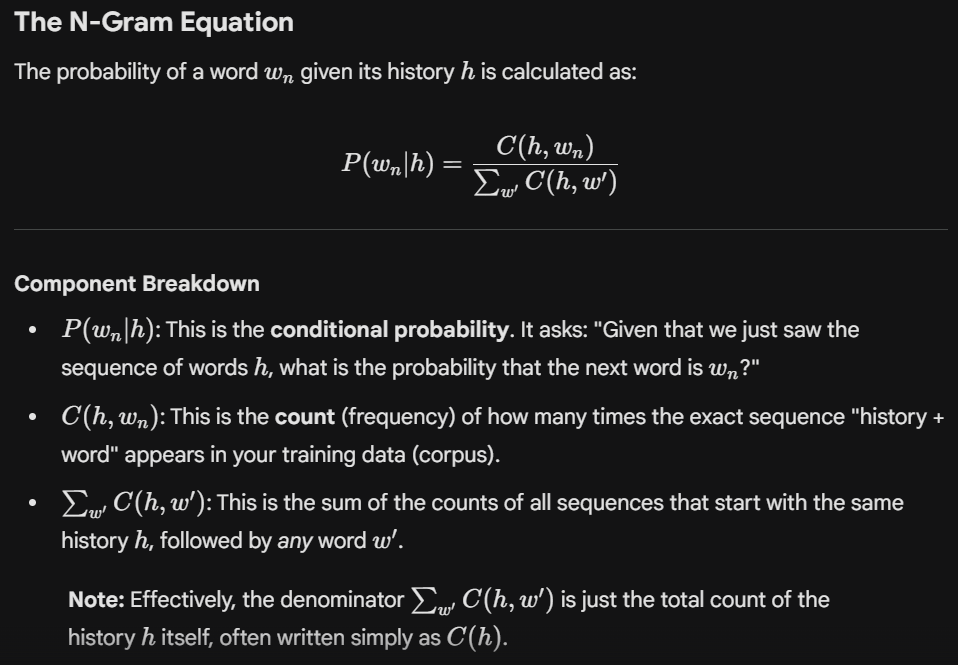

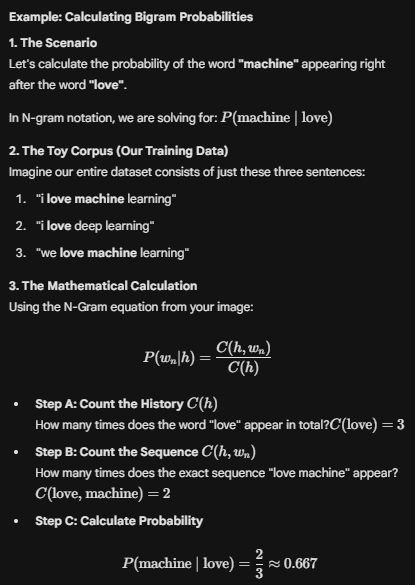

In [10]:
def generate_ngrams(text,n):
    #returns a list of n-grams as tuples
    sample_text="#"*(n-1)+text
    ngrams_list=[]
    for i in range(len(sample_text)-n+1):
        ngrams_list.append(tuple(sample_text[i:i+n]))#tuple does character level tokenization on the string
    
    return ngrams_list


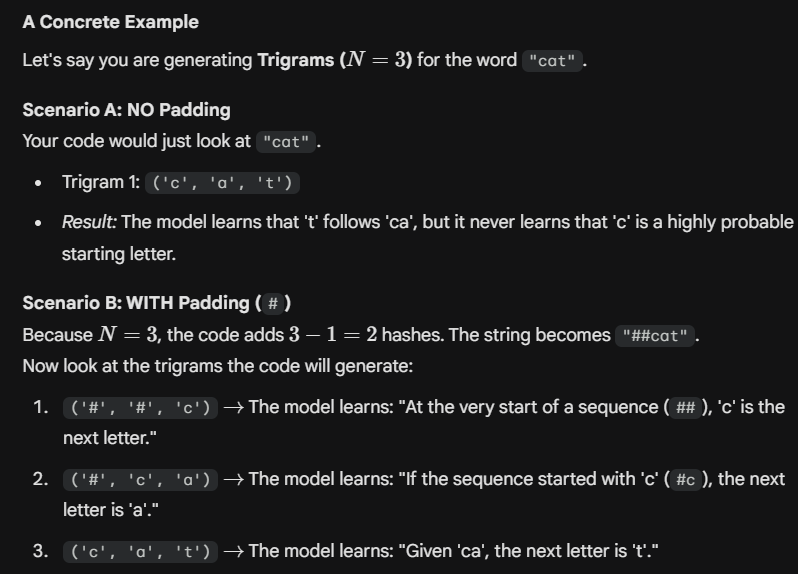

In [11]:
print("Character level bigrams :",generate_ngrams("hello world",3))

Character level bigrams : [('#', '#', 'h'), ('#', 'h', 'e'), ('h', 'e', 'l'), ('e', 'l', 'l'), ('l', 'l', 'o'), ('l', 'o', ' '), ('o', ' ', 'w'), (' ', 'w', 'o'), ('w', 'o', 'r'), ('o', 'r', 'l'), ('r', 'l', 'd')]


In [12]:
def build_ngram_model(corpus,n):
    model=defaultdict(Counter)
    ngrams=generate_ngrams(corpus,n)

    #build the model
    for ngram in ngrams:
        context=ngram[:-1]
        char=ngram[-1]
        model[context][char]+=1
    
    #convert to probabilities
    for key,val in model.items():
        total_val=0
        for in_key,in_val in model[key].items():
            total_val=total_val+in_val
        for in_key,in_val in model[key].items():
            model[key][in_key]=model[key][in_key]/total_val
        
    return model

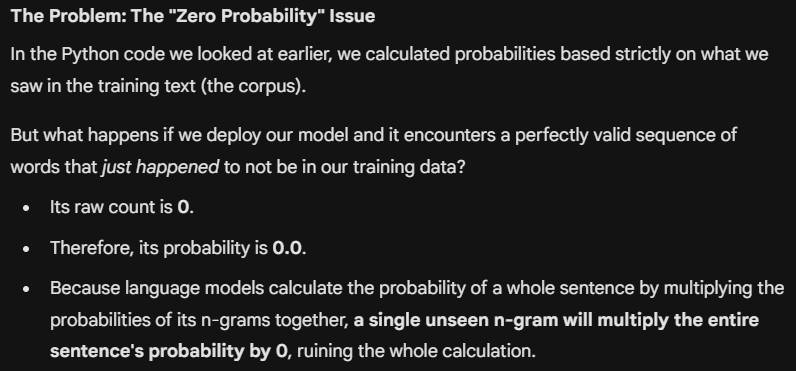

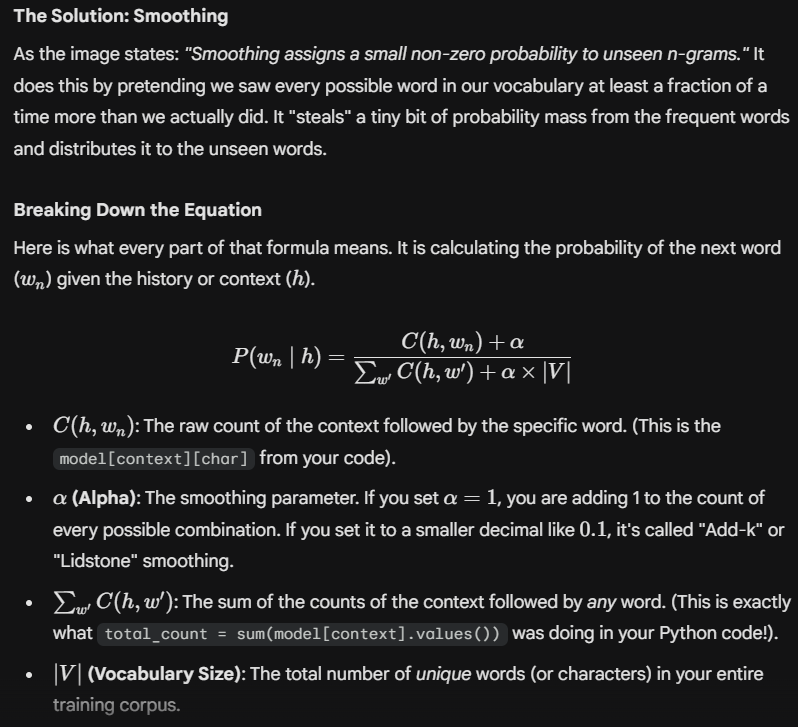

In [13]:
def add_smoothing(model,vocabulary_size,alpha=1.0):
    smoothed_model=defaultdict(Counter)
    for key,val in model.items():
        total_val=0
        for in_key,in_val in val.items():
            total_val+=in_val
        denominator=total_val+vocabulary_size*alpha
        for in_key,in_val in val.items():
            numerator=in_val+alpha
            smoothed_model[key][in_key]=numerator/denominator
    
    return smoothed_model

In [ ]:
def generate_text(model,n,start_text,length=10): #To generate 100 characters
    current_text=start_text

    for _ in range(length):
        context=tuple(current_text[-(n-1):])

        if context not in model:
            break

        char_dist=model[context]

        chars=list(char_dist.keys())
        probs=list(char_dist.values())
        next_char = random.choices(chars, weights=probs)[0]#choose random based on probabilities(lottery ticket)
        current_text += next_char
    
    return current_text
        


In [39]:
text="hello world this is a sample text input"
bigram_model=build_ngram_model(text,2)
generated=generate_text(bigram_model,2,"he",30)
print(generated)#generated text

he thisamputelo texthinplo s tex
